In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import make_column_transformer

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression


<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
credits_df = pd.read_csv("data/UCI_Credit_Card.csv")
credits_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(credits_df, test_size = .3, random_state = 123)
train_df.shape, test_df.shape


((21000, 25), (9000, 25))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
# Summary statistics for the training dataset
summary_stats = train_df.describe()

# Display the summary statistics
summary_stats

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In the summary statistics, the target variable default.payment.next.month has a mean of 0.2212, indicating that around 22.1% of customers are at risk of default, which suggests a class imbalance in the dataset. Additionally, the repayment status features (PAY_0 to PAY_6) have mean values close to zero, indicating that most customers pay on time or have minor delays, while the maximum value of 8 shows that some customers have severe repayment delays.

In [6]:
correlation_matrix = train_df.corr()
correlation_with_response = correlation_matrix['default.payment.next.month']
# Convert the correlation with response variable to a DataFrame
correlation_with_response_df = correlation_with_response.reset_index()
correlation_with_response_df.columns = ['Feature', 'Correlation with Default Payment']

# Display the correlation DataFrame
correlation_with_response_df

,Feature,Correlation with Default Payment
0,ID,-0.017861
1,LIMIT_BAL,-0.149247
2,SEX,-0.046320
3,EDUCATION,0.026558
4,MARRIAGE,-0.021735
5,AGE,0.010715
6,PAY_0,0.325102
7,PAY_2,0.265160
8,PAY_3,0.240503
9,PAY_4,0.219692



The correlation with the target variable shows that recent repayment statuses (PAY_0 to PAY_6) are the most significant positive predictors of default risk, while credit limit (LIMIT_BAL) and payment amounts have weaker negative correlations with default risk.

/var/folders/69/n41lhlxd7zz7y66vhl2v1hcm0000gn/T/ipykernel_33284/3421227548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default.payment.next.month', data=train_df, palette='viridis')


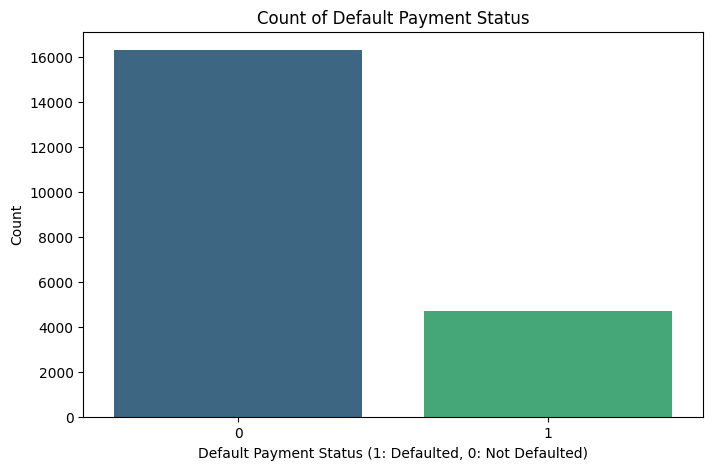

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='default.payment.next.month', data=train_df, palette='viridis')
plt.title('Count of Default Payment Status')
plt.xlabel('Default Payment Status (1: Defaulted, 0: Not Defaulted)')
plt.ylabel('Count')
plt.show()

The chart shows a significant class imbalance, with a much larger number of non-defaulted customers (0) compared to defaulted ones (1). This imbalance may cause the model to favor predicting non-default outcomes, leading to poor performance in identifying defaulted customers.

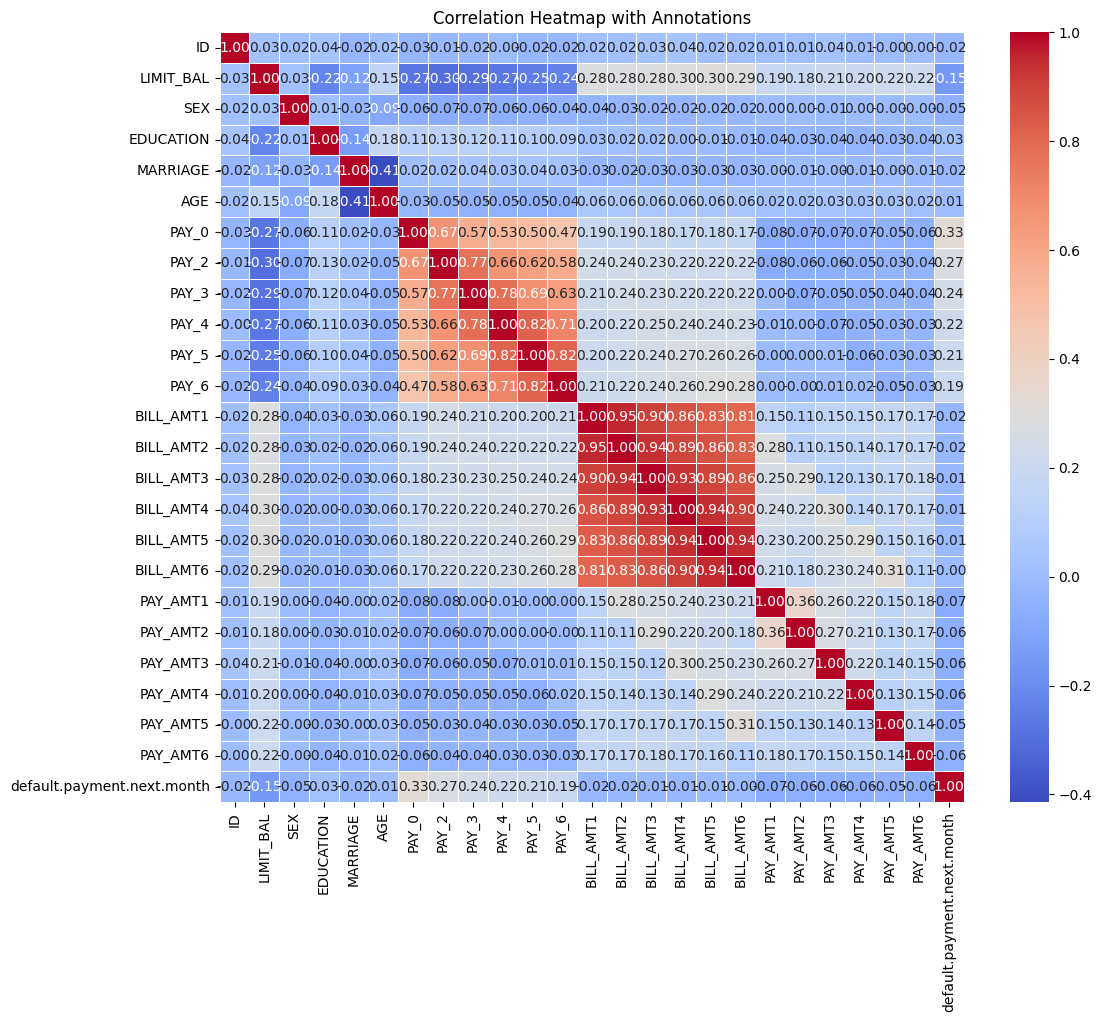

In [8]:
# Compute the correlation matrix for the training dataset
correlation_matrix = train_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Annotations')
plt.show()


The correlation heatmap shows that the features PAY_0, PAY_2, PAY_3, etc., have relatively high positive correlations with the default payment status, indicating that recent payment behaviors are strong predictors of whether a customer will default. On the other hand, features like LIMIT_BAL and PAY_AMT series have weaker correlations with the target variable, suggesting they may be less impactful individually. There are also strong correlations among the BILL_AMT features, indicating possible redundancy.

### Used metric: F1 score
There is a class imbalance in the response variable, using F1 score is a better evaluation metric than accuracy. The F1 score helps to balance precision and recall, providing a more comprehensive view of how well the model is handling both the majority and minority classes. 

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [14]:


# Custom transformer for feature engineering
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        # 1. Create new feature: Repayment Ratio for each month (PAY_AMT / BILL_AMT)
        for i in range(1, 7):
            X_transformed[f'REPAY_RATIO_{i}'] = X_transformed[f'PAY_AMT{i}'] / X_transformed[f'BILL_AMT{i}'].replace(0, 1e-6)

        # 2. Create new feature: Total Repayment Amount
        X_transformed['TOTAL_REPAY_AMT'] = X_transformed[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)

        # 3. Create new feature: Total Bill Amount
        X_transformed['TOTAL_BILL_AMT'] = X_transformed[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)

        # 4. Create new feature: Number of months with delayed payments (PAY_0 to PAY_6 > 0)
        X_transformed['NUM_DELAYED_MONTHS'] = X_transformed[[f'PAY_{i}' for i in [0, 2, 3, 4, 5, 6]]].apply(lambda x: sum(x > 0), axis=1)

        return X_transformed

# Custom transformer for dropping redundant features
class DropFeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.features_to_drop)

# Features to drop: PAY_AMT{i} and BILL_AMT{i}
features_to_drop_specific = [f'PAY_AMT{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)]

We creates new features (like repayment ratio, total repayment, and billing amount) to better capture repayment behavior, and then removes redundant original features using custom transformers for use in a preprocessing pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = [
    'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
    'TOTAL_REPAY_AMT', 'TOTAL_BILL_AMT', 'NUM_DELAYED_MONTHS'
] + [f'REPAY_RATIO_{i}' for i in range(1, 7)]

In [16]:
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_features),  # Apply OneHotEncoder to categorical features
    (StandardScaler(), numerical_features),               # Apply StandardScaler to numerical features
    remainder='passthrough'                               # Keep the remaining features as they are
)

In [17]:
# Create a column transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_features),  # Apply OneHotEncoder to categorical features
    (StandardScaler(), numerical_features),               # Apply StandardScaler to numerical features
    remainder='passthrough'                               # Keep the remaining features as they are
)

full_pipeline_with_column_transformer = Pipeline(steps=[
    ('feature_engineering', FeatureEngineeringTransformer()),  # Feature Engineering Step
    ('drop_features', DropFeaturesTransformer(features_to_drop=features_to_drop_specific)),  # Drop redundant features
    ('column_transformer', column_transformer)  # Apply column transformations
])

In [18]:
y_train = train_df['default.payment.next.month']
X_train = train_df.drop(columns=['default.payment.next.month'])

train_df_transformed_full = full_pipeline_with_column_transformer.fit_transform(X_train)
train_df_transformed_full = pd.DataFrame(train_df_transformed_full)
train_df_transformed_full

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.173458,-0.395799,-0.534714,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,16396.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.185515,0.679910,-0.534714,-0.033706,-0.041885,-0.043319,-0.050018,-0.051039,-0.052235,21449.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.517197,-0.709155,-0.534714,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,20035.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.188086,0.684784,-0.534714,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,25756.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.409324,-0.170296,0.755826,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,1439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.375884,-0.480740,0.110556,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,28637.0
20996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.361582,-0.677093,0.110556,-0.033706,-0.041886,0.520144,-0.050018,-0.051039,-0.052235,17731.0
20997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.399714,-0.184677,-0.534714,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,28031.0
20998,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.384873,-0.280246,-0.534714,-0.033706,-0.041886,-0.043319,-0.050018,-0.051039,-0.052235,15726.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

# Initialize a Dummy Classifier as a baseline
dummy_model = DummyClassifier(strategy='most_frequent', random_state=123)

# Perform cross-validation on the training data using `cross_validate`
dummy_scores = cross_validate(dummy_model, X_train, y_train, cv=5, return_train_score=True, scoring='f1_weighted')

pd.DataFrame(dummy_scores)


,fit_time,score_time,test_score,train_score
0,0.002071,0.002402,0.679362,0.679118
1,0.002118,0.002204,0.679362,0.679118
2,0.002007,0.002287,0.679037,0.679200
3,0.001879,0.002085,0.679037,0.679200
4,0.002070,0.002131,0.679037,0.679200


Since we used a dummy classifier with the 'most_frequent' strategy, there is almost no difference between the train_score and test_score. This is because the dummy classifier simply predicts the most frequent class for every instance, leading to very similar performance across both the training and testing data.

Moreover, given that there is a class imbalance in the response variable, using F1 score is a better evaluation metric than accuracy. The F1 score helps to balance precision and recall, providing a more comprehensive view of how well the model is handling both the majority and minority classes. 

In [20]:
...

Ellipsis

In [21]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [22]:
logistic_model = LogisticRegression()

# Perform cross-validation on the training data using `cross_validate`
logistic_scores = cross_validate(logistic_model, X_train, y_train, cv=5, return_train_score=True, scoring='f1_weighted')

# Convert cross-validation results to a DataFrame
logistic_scores_df = pd.DataFrame(logistic_scores)

# Display the cross-validation results as a DataFrame
logistic_scores_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

,fit_time,score_time,test_score,train_score
0,0.474118,0.011341,0.679929,0.679089
1,0.520420,0.008842,0.679362,0.679231
2,0.310610,0.008779,0.678920,0.679341
3,0.352909,0.011907,0.679037,0.679341
4,0.437289,0.007728,0.679037,0.679341



The test and train F1 scores are almost the same in all the folds, which means the logistic regression model is not overfitting or underfitting. However, its performance is very similar to the dummy classifier, which suggests that the logistic model isn't finding useful patterns in the data to improve predictions.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid with only 'C' for hyperparameter tuning
param_grid_c_only = {
    'C': [.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Initialize the RandomizedSearchCV with logistic regression model
random_search_c_only = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=123),
    param_distributions=param_grid_c_only,
    n_iter=100,
    scoring='f1_weighted',
    random_state=123,
    n_jobs=-1,
    return_train_score=True
)

# Fit the random search on the training data
random_search_c_only.fit(train_df_transformed_full, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1)

RandomizedSearchCV(estimator=LogisticRegression(random_state=123), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                   random_state=123, return_train_score=True,
                   scoring='f1_weighted')

In [24]:
cv_results_df = pd.DataFrame(random_search_c_only.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "param_C",
        "mean_train_score",
        "mean_fit_time",
        "rank_test_score"
    ]
].set_index("rank_test_score").sort_index().T
cv_results_df

rank_test_score,1,2,3,4,5,6
mean_test_score,0.778118,0.777622,0.777617,0.77755,0.77677,0.768873
std_test_score,0.003581,0.003492,0.002379,0.002211,0.002168,0.003267
param_C,0.1,0.01,100,10,1,0.001
mean_train_score,0.778169,0.77762,0.777709,0.778259,0.777108,0.768553
mean_fit_time,0.457229,0.506758,0.406469,0.451873,0.418912,0.423812



Based on the result from the hyperparameter tuning using RandomizedSearchCV, the best value for the regularization parameter C is 0.1. The corresponding F1 score (weighted) is approximately 0.778.

The logistic regression model was evaluated using cross-validation, and the mean F1 scores ranged from 0.7689 to 0.7781 across different values of the regularization parameter C. The highest score was achieved with C=0.1, indicating optimal balance between underfitting and overfitting. The standard deviations were relatively small (ranging from 0.0022 to 0.0036), suggesting consistent performance across cross-validation folds.

The mean test scores across different C values are all very close, ranging from 0.7689 to 0.7781. This indicates that different levels of regularization have only a minor impact on model performance, suggesting the model is quite robust to changes in this hyperparameter. And there is no significant difference between the mean test scores and mean train scores across different values of the regularization parameter C. All mean scores are very close, indicating that the model's performance is consistent regardless of the regularization strength used. This suggests that the model is neither overfitting nor underfitting, as both the training and validation scores are stable and similar.

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid with only 'n_neighbors' for hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11]  # Number of neighbors to use
}

# Initialize the RandomizedSearchCV with KNN model
random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_grid_knn,
    n_iter=5,
    scoring='f1_weighted',
    random_state=123,
    n_jobs=-1,
    return_train_score=True
)

# Fit the random search on the training data
random_search_knn.fit(train_df_transformed_full, y_train)

# Add mean_train_score, mean_test_score, and std_test_score to the DataFrame for KNN
cv_results_df_knn = pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_train_score",
        "param_n_neighbors",
        "mean_fit_time",
        "rank_test_score"
    ]
].set_index("rank_test_score").sort_index().T
cv_results_df_knn

rank_test_score,1,2,3,4,5
mean_test_score,0.69926,0.694449,0.690368,0.688399,0.685578
std_test_score,0.003988,0.004106,0.00297,0.003256,0.001975
mean_train_score,0.821132,0.763087,0.733769,0.715971,0.704059
param_n_neighbors,3,5,7,9,11
mean_fit_time,0.009743,0.017485,0.008018,0.006224,0.007383


In [38]:
import xgboost as xgb

# Define the parameter grid for hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2]  # Step size shrinkage used in updates to prevent overfitting
}

# Initialize the RandomizedSearchCV with XGBoost model
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123),
    param_distributions=param_grid_xgb,
    n_iter=5,
    scoring='f1_weighted',
    random_state=123,
    n_jobs=-1,
    return_train_score=True
)

# Fit the random search on the training data
random_search_xgb.fit(train_df_transformed_full, y_train)

# Add mean_train_score, mean_test_score, and std_test_score to the DataFrame for XGBoost
cv_results_df_xgb = pd.DataFrame(random_search_xgb.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_train_score",
        "param_n_estimators",
        "param_max_depth",
        "param_learning_rate",
        "mean_fit_time",
        "rank_test_score"
    ]
].set_index("rank_test_score").sort_index().T

# Display the formatted DataFrame for XGBoost
cv_results_df_xgb


ModuleNotFoundError: No module named 'xgboost'

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

In [29]:
import xgboost as xgb
print(xgb.__version__)

ModuleNotFoundError: No module named 'xgboost'

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)